In [6]:
#reading file and storing data into dataframe
import pandas as pd
fraudCheckData = pd.read_csv('Fraud_check.csv')
fraudCheckData

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [7]:
fraudCheckData.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [8]:
#Renaming columns and removing '.' from column names which can create problems in further processing
fraudCheckData=fraudCheckData.rename(columns={'Marital.Status':'maritalStatus','Taxable.Income':'taxableIncome','City.Population':'cityPopulation','Work.Experience':'workExperience'})

In [9]:
#Check for non numeric dara.
#columns Undergrad, maritalStatus, Urban have non numeric data
fraudCheckData.columns

Index(['Undergrad', 'maritalStatus', 'taxableIncome', 'cityPopulation',
       'workExperience', 'Urban'],
      dtype='object')

In [10]:
#mapping non numeric data into numeric 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
fraudCheckData['Undergrad']= label_encoder.fit_transform(fraudCheckData['Undergrad']) 

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
fraudCheckData['maritalStatus']= label_encoder.fit_transform(fraudCheckData['maritalStatus'])

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
fraudCheckData['Urban']= label_encoder.fit_transform(fraudCheckData['Urban'])

In [11]:
#Checking max value to identify bins for transforming into categorical data
fraudCheckData["taxableIncome"].max()

99619

In [12]:
#creating new column fraudVulnerability that contains labels(Y)
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
fraudCheckData["fraudVulnerability"]=pd.cut(fraudCheckData.taxableIncome,bins=[0,30000,100000],labels=["Risky","Good"])

C:\Users\abhishek.abhishek-HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\abhishek.abhishek-HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


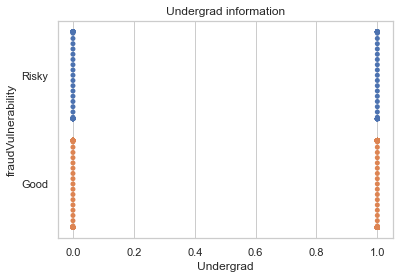

In [13]:
#Data visualization using seaborn graphs
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.swarmplot(x='Undergrad', y='fraudVulnerability', data=fraudCheckData)
plt.title('Undergrad information')
plt.show()

C:\Users\abhishek.abhishek-HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\abhishek.abhishek-HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


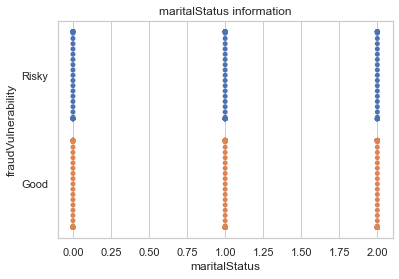

In [14]:
sns.set(style="whitegrid")
ax = sns.swarmplot(x='maritalStatus', y='fraudVulnerability', data=fraudCheckData)
plt.title('maritalStatus information')
plt.show()

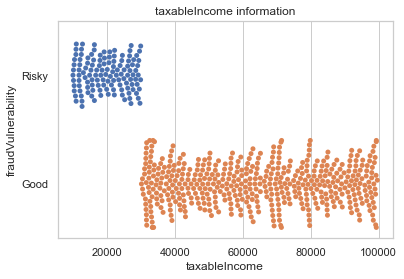

In [15]:
sns.set(style="whitegrid")
ax = sns.swarmplot(x='taxableIncome', y='fraudVulnerability', data=fraudCheckData)
plt.title('taxableIncome information')
plt.show()

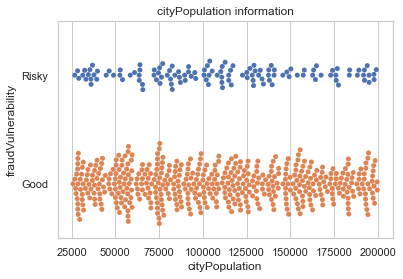

In [16]:
sns.set(style="whitegrid")
ax = sns.swarmplot(x='cityPopulation', y='fraudVulnerability', data=fraudCheckData)
plt.title('cityPopulation information')
plt.show()

C:\Users\abhishek.abhishek-HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


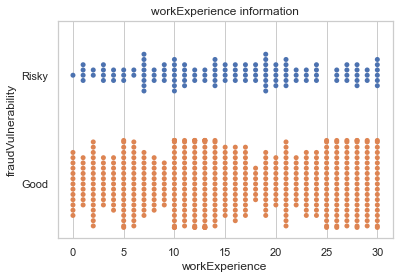

In [17]:
sns.set(style="whitegrid")
ax = sns.swarmplot(x='workExperience', y='fraudVulnerability', data=fraudCheckData)
plt.title('workExperience information')
plt.show()

C:\Users\abhishek.abhishek-HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\abhishek.abhishek-HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


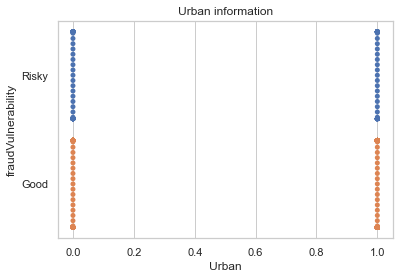

In [18]:
sns.set(style="whitegrid")
ax = sns.swarmplot(x='Urban', y='fraudVulnerability', data=fraudCheckData)
plt.title('Urban information')
plt.show()

In [14]:
#Inputs to decision tree
X=fraudCheckData.iloc[:,0:6]
X

,Undergrad,maritalStatus,taxableIncome,cityPopulation,workExperience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [15]:
#Labels
Y=fraudCheckData.iloc[:,6:7]
Y

,fraudVulnerability
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [16]:
#Checking null values in X
X.isnull().sum()

Undergrad         0
maritalStatus     0
taxableIncome     0
cityPopulation    0
workExperience    0
Urban             0
dtype: int64

In [17]:
#Checking null values in Y
Y.isnull().sum()

fraudVulnerability    0
dtype: int64

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

C:\Users\abhishek.abhishek-HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\abhishek.abhishek-HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhishek.abhishek-HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhishek.abhishek-HP\anaconda3\lib\site-packages\sklearn\model_selection\_validatio

0.9983333333333334
